In [13]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as np

Requirement already up-to-date: seaborn in c:\users\wanderlei\anaconda3\lib\site-packages (0.11.1)


In [14]:
PX = ['NORMAL', 500, 100]
PY = ['NORMAL', 1000, 100]
PZ = ['NORMAL', 3, 0.3]
POP = [100]

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 2,
        'D': 3,
        'VARS': [PX, PY, PZ],
        'MODEL': 'MCS'}

In [15]:
def OBJ(X):
    P_X = X[0]
    P_Y = X[1]
    P_Z = X[2]
    
    D_0 = 3
    L = 100
    E = 30 * 10 ** 6
    W = 2
    T = 4

    # STATE LIMIT FUNCTION
    
    R_0 = P_Z
    S_0 = (4 * L ** 3 / (E * W * T)) * (((P_Y / T ** 2) ** 2  + (P_X / W ** 2) ** 2) ** 0.5)
    G_0 = - R_0 + S_0

    R_1 = P_Z * 1.10
    S_1 = ((4 * L ** 3 / (E * W * T)) * (((P_Y / T ** 2) ** 2  + (P_X / W ** 2) ** 2) ** 0.5)) * 1.05
    G_1 = - R_1 + S_1

    R = [R_0, R_1] 
    S = [S_0, S_1] 
    G = [G_0, G_1]


    return R, S, G

In [16]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [17]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,R_1,S_0,S_1,G_0,G_1,I_0,I_1
0,468.301006,1029.993158,3.121772,3.121772,3.433949,2.226775,2.338114,-0.894996,-1.095835,0.0,0.0
1,333.602718,1000.993133,2.761871,2.761871,3.038058,1.737630,1.824511,-1.024241,-1.213546,0.0,0.0
2,689.678500,1067.897349,3.189266,3.189266,3.508192,3.081451,3.235524,-0.107814,-0.272668,0.0,0.0
3,337.225654,989.139847,3.591073,3.591073,3.950180,1.742399,1.829519,-1.848674,-2.120661,0.0,0.0
4,461.914691,853.459605,3.332687,3.332687,3.665956,2.120050,2.226053,-1.212637,-1.439903,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,553.019135,1046.489990,3.176084,3.176084,3.493692,2.549089,2.676544,-0.626995,-0.817149,0.0,0.0
96,483.431208,1030.264256,2.818455,2.818455,3.100301,2.282352,2.396470,-0.536103,-0.703831,0.0,0.0
97,644.910565,1082.214141,3.098527,3.098527,3.408380,2.914013,3.059714,-0.184514,-0.348666,0.0,0.0
98,663.627314,960.859287,2.677153,2.677153,2.944868,2.940688,3.087722,0.263535,0.142854,1.0,1.0


In [18]:
DADOS = RESULTS_TEST[0]['TOTAL RESULTS']

C:\Users\Wanderlei\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


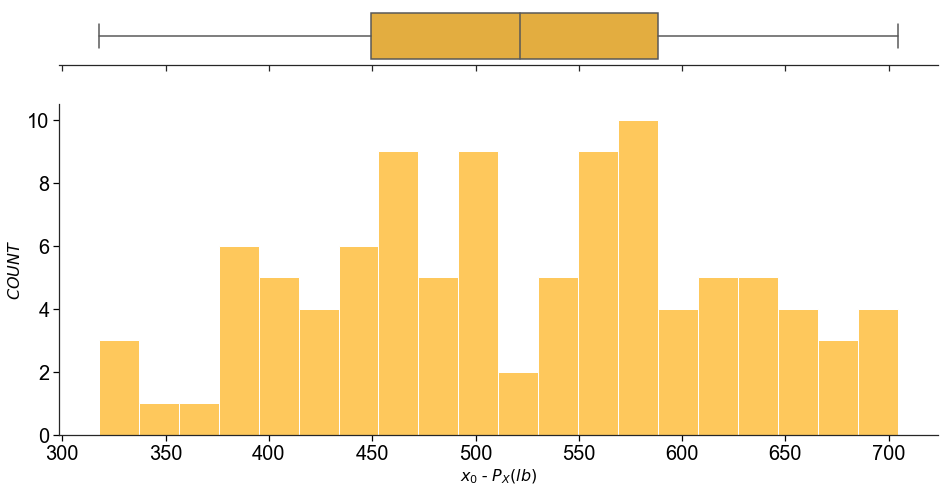

In [19]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

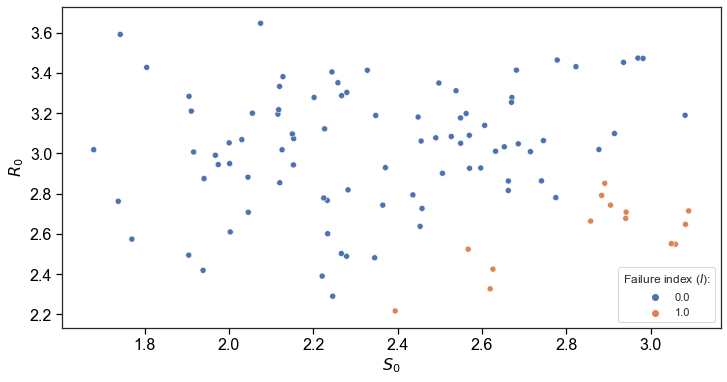

In [20]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [21]:
PLOT_SETUP = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}
# RESULTS
DATASET = WANDER  
# CALL PLOT
RASD_PLOT_3(DATASET, PLOT_SETUP)

NameError: name 'WANDER' is not defined

In [ ]:
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)

In [ ]:
PLOT_SETUP = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0 + G_0$',
                    'Y AXIS LABEL': '$SOMATÓRIO$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
DATASET = WANDER  
# CALL PLOT
RASD_PLOT_4(DATASET, PLOT_SETUP)